In [5]:

'''
Importing Libraries
'''
import pandas as pd
import numpy as np 
import seaborn as sns
import requests
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv('Felony_Sentences.csv')

data.head(20)

,OBJECTID,RID,GENERIC_CASE_ID,GENERIC_OFFENDER_ID,CHARGE_NUMBER,SENTENCE_YEAR,RACE,GENDER,AGE_GROUP,OFFENSE,...,OFFENSE_SEVERITY_GROUP,SENTENCE_TYPE,SENTENCE_IMPOSED_MONTHS,SENTENCE_SUSPENDED_MONTHS,SENTENCE_TO_SERVE_MONTHS,SENTENCE_PROBATION_MONTHS,VVCA_AMT,FINE_AMT,RESTITUTION_AMT,FINE_SUSPENDED_AMT
0,1,1,3574668,3485785,1,2018,Black,M,15-17,1ST DEG MURDER W/ARMED,...,M1,Indeterminate/Incarceration,NaN,NaN,NaN,NaN,100,0.0,0.0,0.0
1,2,2,3806508,7427096,9,2018,Black,M,15-17,Conspiracy,...,M9,Indeterminate,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0
2,3,3,3806508,7427096,12,2018,Black,M,15-17,Murder I,...,M1,Life,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0
3,4,4,3806508,7427096,13,2018,Black,M,15-17,1ST DEG MURDER W/ARMED,...,M1,Life,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0
4,5,5,3806508,7427096,15,2018,Black,M,15-17,Poss Firearm During Crime of Violence or Dange...,...,M5,Indeterminate,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0
5,6,6,3806508,7427096,16,2018,Black,M,15-17,Carrying a Pistol Without a License,...,M8,Short Split,12.0,12.0,1.0,60.0,0,0.0,0.0,0.0
6,7,7,7806164,1021121,2,2018,Other or Unknown,M,22-30,UCSA PWID COCAINE,...,D2,Indeterminate,NaN,NaN,NaN,NaN,0,0.0,0.0,0.0
7,8,8,9015717,5317747,4,2018,Other or Unknown,M,15-17,ASLT W/I KILL WHILE ARMED,...,M3,Probation,180.0,180.0,0.0,36.0,0,0.0,0.0,0.0
8,9,9,4792566,7849479,6,2018,Black,M,15-17,1ST DEG MURDER W/ARMED,...,M1,Life,NaN,NaN,NaN,NaN,100,0.0,0.0,0.0
9,10,10,4792566,7849479,7,2018,Black,M,15-17,POS. F/A DURING VIO/DAG OFF,...,M5,Indeterminate,NaN,NaN,NaN,NaN,100,0.0,0.0,0.0


In [7]:
'''RID/Race/offesce type/offense/severity - is the severity of similar crimes the same by race?'''

'''cases by race - how many cases are there per race?'''

'''type by age and gender'''

'''Race/offense type/sentence type/sentence imposted month - are sentences given similar for similar crimes by race?'''

'Race/offense type/sentence type/sentence imposted month - are sentences given similar for similar crimes by race?'

In [8]:
race = data.value_counts('RACE')
race.head()

RACE
Black               21184
Other or Unknown     1262
White                 823
Hispanic               49
Asian                  12
dtype: int64

In [9]:
gender = data.value_counts('GENDER')
gender.head()

GENDER
M    21218
F     1858
dtype: int64

In [10]:
age = data.value_counts('AGE_GROUP')
print(age)

AGE_GROUP
22-30    7783
18-21    5540
31-40    4259
41-50    2964
51-60    1632
15-17     720
61-70     305
71+        22
dtype: int64


In [11]:
sns.barplot(x = "AGE_GROUP", y = "GENDER", data = data)
plt.xlabel("Hours")
plt.ylabel("Number of Orders")
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

In [19]:
#Calculate the average number of charges by each gender in each race listed in this dataset
charges = pd.DataFrame(data.groupby(['RACE', 'GENDER']).agg('mean')['CHARGE_NUMBER']).reset_index()

In [20]:
#Fetch the average number of charges for male members belonging to each race
male_charges = list(charges[charges['GENDER'] =='M']['CHARGE_NUMBER'])

#Fetch the average number of charges for female members belonging to each race
female_charges = list(charges[charges['GENDER'] =='F']['CHARGE_NUMBER'])

#Insert 0s for the average charge numbers for female Native Americans and Pacific Islanders(becasue they are not present in the dataset)
female_charges.insert(3, 0)
female_charges.insert(5, 0)

races = list(charges['RACE'].unique())
X_axis = np.arange(0, len((charges['RACE'].unique())))

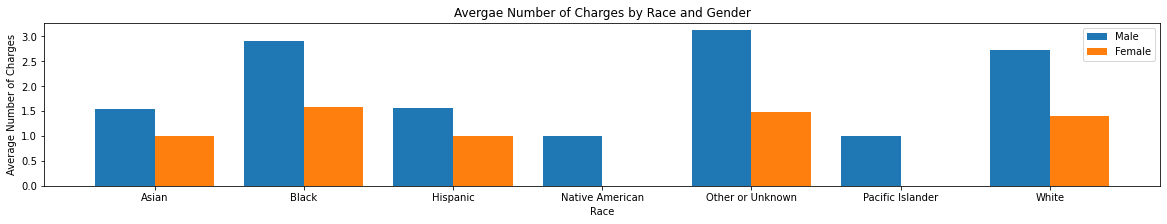

In [21]:
#Plotting the average number of charges by race and gender
plt.bar(X_axis - 0.2, male_charges, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_charges, 0.4, label = 'Female')
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(X_axis, races)
plt.xlabel("Race")
plt.ylabel("Average Number of Charges")
plt.title("Avergae Number of Charges by Race and Gender")
plt.legend()
plt.show()

In [ ]:
# Question 5
#  What can be infered about the average of imposed sentence for certain races beloging to a certain age group?

In [22]:
# Group collumns "RACE","AGE_GROUP", and "SENTENCE_IMPOSED_MONTHS". With the content of "SENTENCE_IMPOSED_MONTHS" calculate the mean of the imposed sentences for each age group for each race. 

rsa = pd.DataFrame(data.groupby(['RACE', 'AGE_GROUP']).agg('mean')['SENTENCE_IMPOSED_MONTHS']).reset_index()

In [23]:
# Cleaning the data by removing rows of data that include values of 'Nan'

rsa_clean = rsa.dropna(axis=0, inplace= False)

#Displaying the clean data
rsa_clean

,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
0,Asian,18-21,28.000000
1,Asian,22-30,24.000000
2,Asian,31-40,20.500000
3,Asian,51-60,10.000000
4,Black,15-17,58.724349
5,Black,18-21,38.648444
6,Black,22-30,37.111589
7,Black,31-40,35.292921
8,Black,41-50,32.575723
9,Black,51-60,27.716556


In [29]:
# Filtering data by age group, in this case the age group of 15 - 17.

rsaGroup1 = rsa_clean[rsa_clean['AGE_GROUP'] == '15-17']
rsaGroup1

,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
4,Black,15-17,58.724349
12,Hispanic,15-17,43.200000
18,Other or Unknown,15-17,49.625000
27,White,15-17,40.833333


<ipython-input-28-c36dc693a71c>:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = rsaGroup1['RACE'], height = rsaGroup1['SENTENCE_IMPOSED_MONTHS'], color = 'gymc')


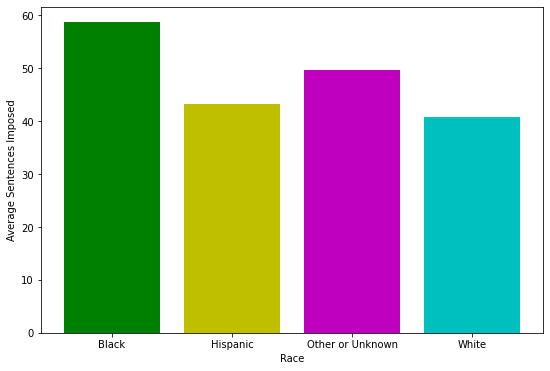

In [28]:
# Plotting the data

plt.figure(figsize = (9,6))
plt.bar(x = rsaGroup1['RACE'], height = rsaGroup1['SENTENCE_IMPOSED_MONTHS'], color = 'gymc')
plt.xlabel('Race')
plt.ylabel('Average Sentences Imposed')
plt.show()

In [30]:
# Filtering data by age group, in this case the age group of 18 - 21.

rsaGroup2 = rsa_clean[rsa_clean['AGE_GROUP'] == '18-21']
rsaGroup2

,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
0,Asian,18-21,28.000000
5,Black,18-21,38.648444
13,Hispanic,18-21,24.571429
17,Native American,18-21,30.000000
19,Other or Unknown,18-21,46.223881
28,White,18-21,61.308176


<ipython-input-37-8c5b394e9736>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = rsaGroup2['RACE'], height = rsaGroup2['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')


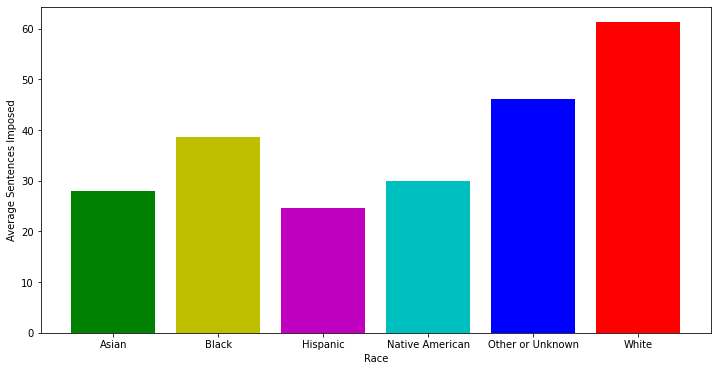

In [37]:
#Plotting the data

plt.figure(figsize = (12,6))
plt.bar(x = rsaGroup2['RACE'], height = rsaGroup2['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')
plt.xlabel('Race')
plt.ylabel('Average Sentences Imposed')
plt.show()

In [38]:
# Filtering data by age group, in this case the age group of 22 - 30.

rsaGroup4 = rsa_clean[rsa_clean['AGE_GROUP'] == '22-30']
rsaGroup4

,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
1,Asian,22-30,24.000000
6,Black,22-30,37.111589
14,Hispanic,22-30,16.535714
20,Other or Unknown,22-30,42.344749
26,Pacific Islander,22-30,6.000000
29,White,22-30,34.753788


<ipython-input-43-f062d758ce2b>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = rsaGroup4['RACE'], height = rsaGroup4['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')


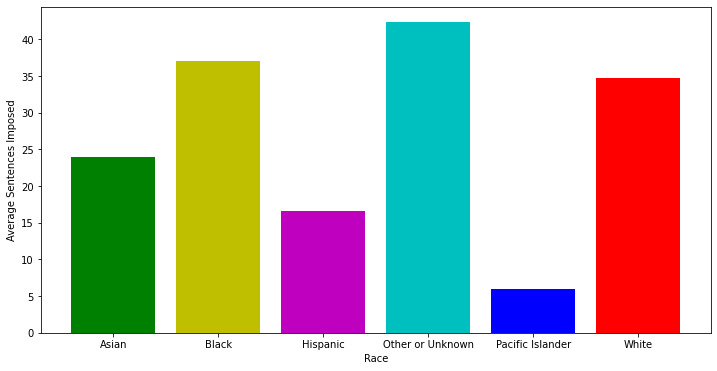

In [43]:
#Plotting the data

plt.figure(figsize = (12,6))
plt.bar(x = rsaGroup4['RACE'], height = rsaGroup4['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')
plt.xlabel('Race')
plt.ylabel('Average Sentences Imposed')
plt.show()

In [44]:
# Filtering data by age group, in this case the age group of 31 - 40.

rsaGroup5 = rsa_clean[rsa_clean['AGE_GROUP'] == '31-40']
rsaGroup5

,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
2,Asian,31-40,20.500000
7,Black,31-40,35.292921
15,Hispanic,31-40,71.000000
21,Other or Unknown,31-40,36.385321
30,White,31-40,37.207547


<ipython-input-53-b6e29dee2fb7>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = rsaGroup5['RACE'], height = rsaGroup5['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')


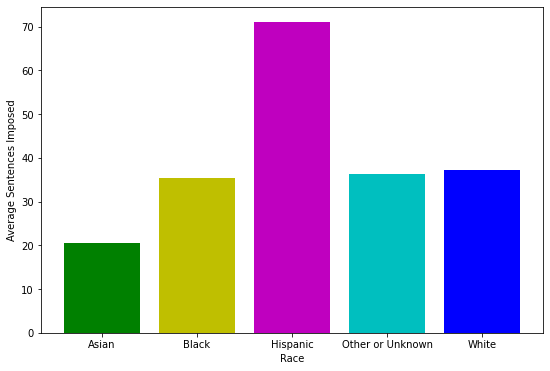

In [53]:
#Plotting the data

plt.figure(figsize = (9,6))
plt.bar(x = rsaGroup5['RACE'], height = rsaGroup5['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')
plt.xlabel('Race')
plt.ylabel('Average Sentences Imposed')
plt.show()

In [49]:
# Filtering data by age group, in this case the age group of 41 - 50.

rsaGroup6 = rsa_clean[rsa_clean['AGE_GROUP'] == '41-50']
rsaGroup6

,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
8,Black,41-50,32.575723
16,Hispanic,41-50,40.000000
22,Other or Unknown,41-50,44.710059
31,White,41-50,25.660870


<ipython-input-52-6f419ef45f6a>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = rsaGroup6['RACE'], height = rsaGroup6['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')


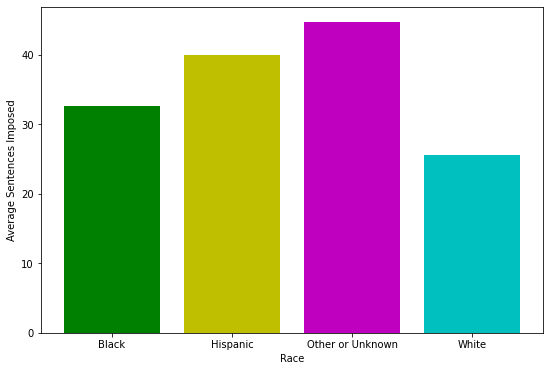

In [52]:
#Plotting the data

plt.figure(figsize = (9,6))
plt.bar(x = rsaGroup6['RACE'], height = rsaGroup6['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')
plt.xlabel('Race')
plt.ylabel('Average Sentences Imposed')
plt.show()

In [54]:
# Filtering data by age group, in this case the age group of 51 - 60.

rsaGroup7 = rsa_clean[rsa_clean['AGE_GROUP'] == '51-60']
rsaGroup7

,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
3,Asian,51-60,10.000000
9,Black,51-60,27.716556
23,Other or Unknown,51-60,24.150000
32,White,51-60,18.461538


<ipython-input-55-534aaf60a920>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = rsaGroup7['RACE'], height = rsaGroup7['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')


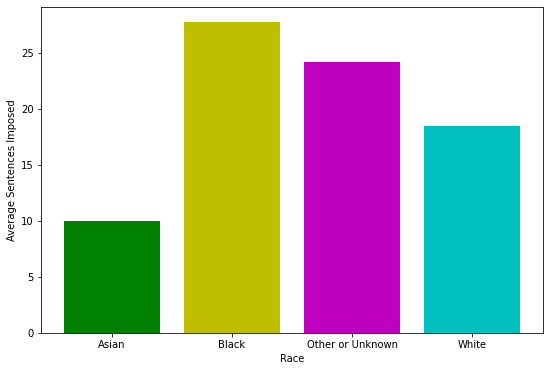

In [55]:
#Plotting the data

plt.figure(figsize = (9,6))
plt.bar(x = rsaGroup7['RACE'], height = rsaGroup7['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')
plt.xlabel('Race')
plt.ylabel('Average Sentences Imposed')
plt.show()

In [56]:
# Filtering data by age group, in this case the age group of 61 - 70.

rsaGroup8 = rsa_clean[rsa_clean['AGE_GROUP'] == '61-70']
rsaGroup8

,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
10,Black,61-70,26.637631
24,Other or Unknown,61-70,22.181818
33,White,61-70,12.571429


<ipython-input-57-7d83bbd4888f>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = rsaGroup8['RACE'], height = rsaGroup8['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')


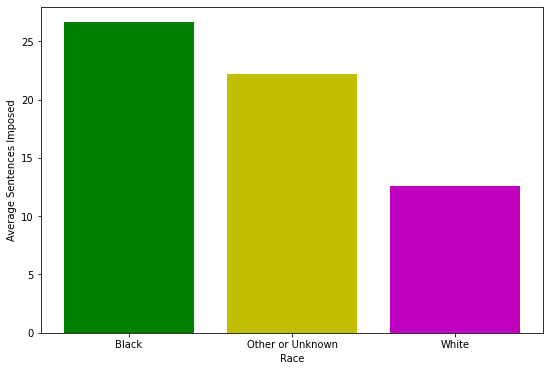

In [57]:
#Plotting the data

plt.figure(figsize = (9,6))
plt.bar(x = rsaGroup8['RACE'], height = rsaGroup8['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')
plt.xlabel('Race')
plt.ylabel('Average Sentences Imposed')
plt.show()

In [60]:
# Filtering data by age group, in this case the age group of 71+.

rsaGroup9 = rsa_clean[rsa_clean['AGE_GROUP'] == '71+']
rsaGroup9

,RACE,AGE_GROUP,SENTENCE_IMPOSED_MONTHS
11,Black,71+,16.421053
25,Other or Unknown,71+,28.666667


<ipython-input-61-e1e5665e44e6>:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(x = rsaGroup9['RACE'], height = rsaGroup9['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')


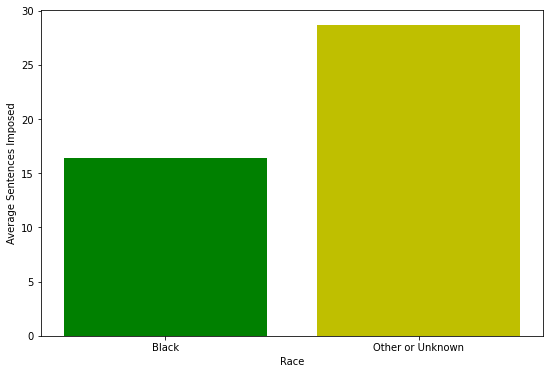

In [61]:
#Plotting the data

plt.figure(figsize = (9,6))
plt.bar(x = rsaGroup9['RACE'], height = rsaGroup9['SENTENCE_IMPOSED_MONTHS'], color = 'gymcbr')
plt.xlabel('Race')
plt.ylabel('Average Sentences Imposed')
plt.show()

In [ ]:
#Analysis

# Based off all of the bar graphs we notice a couple trends as it relates to 